# **Neural** 

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#loading datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path2 = "/content/drive/MyDrive/emnist-letters-test.csv"
path1 = "/content/drive/MyDrive/emnist-letters-train.csv"

Train0 = pd.read_csv(path1, header = None)
Train1 = Train0.to_numpy()

Test0 = pd.read_csv(path2, header = None)
Test1 = Test0.to_numpy()

In [6]:
def standardisation(A):
  A_mean = np.mean(A, axis = 0)
  A_std_dev = np.std(A, axis = 0)
  A_standardised = (A - A_mean)/ A_std_dev
  return A_standardised

def feature_scaling(A) : 
  return np.divide(A, 256)



In [7]:
X_train0 = Train1[:,1:]
X_train1 = feature_scaling(X_train0)

In [43]:
X_test0 = Test1[:,1:]
X_test1 = feature_scaling(X_test0)


In [40]:
def Neural_2_layered( iterations, alpha, X, Y) :
  #prefferable no. of nodes in hidden layer = sqrt(input layer node * output layer node), here it is approx 142
  theta1 = np.zeros((X.shape[1], 142))
  theta2 = np.zeros((142,26))
  b1 = np.ones((X.shape[0], 142))
  b2 = np.ones((X.shape[0], 26))
  m = X.shape[0]

 
  for i in range(iterations):
    #forward propopgation
    superscript1 = np.dot (X, theta1) + b1
    Act1  = 1/(1+(np.exp(-superscript1)))

    superscript2 = np.dot (Act1, theta2) + b2
    Act2 = 1/(1+(np.exp(-superscript2)))
    
    cost = (1/m)*(np.sum(-Y*(np.log(Act2)) - ((1-Y)*(np.log(1-Act2)))))

    #backward propogation
    dZ2 = (Act2 - Y)
    dtheta2 = (1/m) * np.dot(Act1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)  #keepdims helps to maintain it as a 2d array
    
    der_Act1 = Act1*(1-Act1)
    dZ1 = np.multiply(np.dot(dZ2, theta2.T), der_Act1)
    dtheta1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)

    

    #parameters update
    theta_1 = theta1 - alpha*dtheta1
    theta1 = theta_1
    b_1 = b1 - alpha*db1
    b1 = b_1

    theta_2 = theta2 - alpha*dtheta2
    theta2 = theta_2
    b_2 = b2 - alpha*db2
    b2 = b_2

    plt.scatter(i, cost)
    #plt.scatter(i, theta)  theta is a vector this doesnt make any sense
    #if i == 100 :
    print (cost)
     
  return theta1, theta2, b1, b2, Act2

In [23]:
Training_label = Train1[:,0]

In [27]:
#Y should be only 0 or 1
Y_train = np.zeros((Train1.shape[0], 26))
for i in range(Train1.shape[0]):
    Y_train[i, Training_label[i]-1] = 1
pd.DataFrame(Y_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88797,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


33.14480387547377
32.20540401507566
31.294287274537062
30.41115766863936
29.555673858162457
28.727451648224505
27.926066795018027
27.151058068121657
26.401930513648576
25.678158863109076
24.97919103389634
24.30445166960491
23.653345671758274
23.025261678750542
22.419575452670518
21.835653139957625
21.272854377329654
20.73053521993709
20.20805087407502
19.7047582218864
19.22001813022133
18.75319754009293
18.303671336951954
17.87082400525971
17.454051073571318
17.052760358565493
16.66637301819458
16.29432442542315
15.936064874914237
15.591060135557143
15.258791861961232
14.93875787800896
14.630472345319784
14.333465829062153
14.047285273006525
13.771493895069254
13.505671013887872
13.249411816217233
13.002327074165189
12.764042820513502
12.53419998960972
12.312454030577742
12.098474498890523
11.891944631679833
11.692560911532839
11.500032622943463
11.314081405050173
11.134440803800693
10.960855826236717
10.793082499188321
10.630887434303107
10.474047401010852
10.322348908734737
10.175587

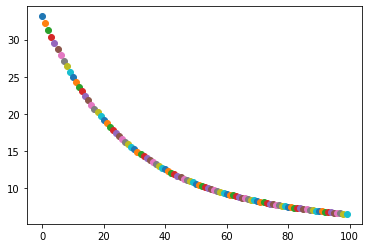

In [66]:
theta1, theta2, b1, b2, Act2 = Neural_2_layered(100, 0.001, X_train1, Y_train)

In [67]:
s1 = np.dot (X_test1, theta1) 
A1  = 1/(1+(np.exp(-s1)))
s2 = np.dot (A1, theta2) 
A2 = 1/(1+(np.exp(-s2)))
#dont know how to add bias

In [68]:
Y_pred_max = np.argmax(A2, axis =1)

In [70]:
Y_pred_max

array([4, 4, 4, ..., 4, 4, 4])

In [71]:
Y_Test = Test1[:,0]

In [72]:
count = 0 
for i in range(Y_Test.shape[0]):
    if Y_Test[i] == Y_pred_max[i] + 1:
        count+=1

In [73]:
count

800

In [75]:
accuracy = (count/14799)*100

In [76]:
accuracy

5.405770660179742